In [12]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
columns_ = ['Pclass','Sex','Age','Fare','Survived']

In [5]:
dfAux = df[columns_]

In [6]:
dfAux.head(5)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [9]:
dfLogic = dfAux

In [10]:
dfLogic['Sex'] = dfLogic['Sex'].map(lambda x: True if x == "female" else False)

/Users/rcuevas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
dfLogic.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [16]:
print dfLogic.Age.mean()
print dfLogic.Age.std()

29.6991176471
14.5264973323


In [17]:
dfLogic['Age'] = dfLogic['Age'].fillna(30) 

/Users/rcuevas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


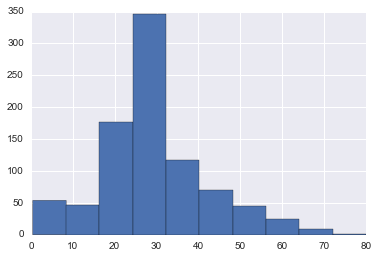

In [19]:
dfLogic.Age.hist()

In [31]:
print dfLogic.Fare.mean()
print dfLogic.Fare.std()
print dfLogic.Fare.max()
print dfLogic.Fare.min()
print dfLogic.Fare.mode()

32.2042079686
49.6934285972
512.3292
0.0
0    8.05
dtype: float64


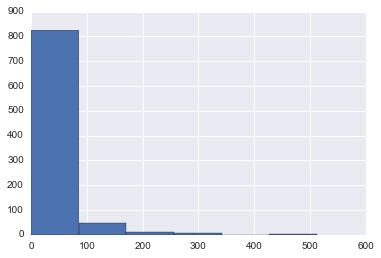

In [28]:
dfLogic.Fare.hist(bins=6)

In [32]:
def fFare(x):
    if x <= 50:
        return "Below"
    if ((x>50) and (x<=100)):
        return "Average"
    if (x>100):
        return "Wealthy"

In [34]:
def fAge(x):
    if x <= 18:
        return "Child"
    if ((x>18) and (x<=60)):
        return "Adult"
    if (x>60):
        return "Senior"

In [35]:
fAge(50)

'Adult'

In [36]:
dfLogic.head(5)

,Pclass,Sex,Age,Fare,Survived
0,3,False,22.0,7.2500,0
1,1,True,38.0,71.2833,1
2,3,True,26.0,7.9250,1
3,1,True,35.0,53.1000,1
4,3,False,35.0,8.0500,0


In [38]:
dfLogic['Age'] = dfLogic['Age'].map(lambda x: fAge(x))

/Users/rcuevas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
dfLogic['Fare'] = dfLogic['Fare'].map(lambda x: fFare(x))

/Users/rcuevas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
dfLogic.head(5)

,Pclass,Sex,Age,Fare,Survived
0,3,False,Adult,Below,0
1,1,True,Adult,Average,1
2,3,True,Adult,Below,1
3,1,True,Adult,Average,1
4,3,False,Adult,Below,0


In [42]:
dfLogic.rename(columns={'Survived':'label'}, inplace=True)

/Users/rcuevas/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [43]:
dfLogic.head(5)

,Pclass,Sex,Age,Fare,label
0,3,False,Adult,Below,0
1,1,True,Adult,Average,1
2,3,True,Adult,Below,1
3,1,True,Adult,Average,1
4,3,False,Adult,Below,0


In [45]:
dfLogic.to_csv("train_easy.csv")

In [46]:
dfLogic.Pclass.unique()

array([3, 1, 2])

In [47]:
def fClass(x):
    if x == 1:
        return "First"
    if x==2:
        return "Second"
    if x==3:
        return "Third"

In [49]:
dfLogic['Pclass'] = dfLogic['Pclass'].map(lambda x: fClass(x))

/Users/rcuevas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
dfLogic.head(5)

,Pclass,Sex,Age,Fare,label
0,Third,False,Adult,Below,0
1,First,True,Adult,Average,1
2,Third,True,Adult,Below,1
3,First,True,Adult,Average,1
4,Third,False,Adult,Below,0


In [51]:
dfLogic.to_csv("train_easy.csv")

In [52]:
dfLogic.rename(columns={'Sex':'Gender'}, inplace=True)

In [53]:
dfLogic.head(5)

,Pclass,Gender,Age,Fare,label
0,Third,False,Adult,Below,0
1,First,True,Adult,Average,1
2,Third,True,Adult,Below,1
3,First,True,Adult,Average,1
4,Third,False,Adult,Below,0


In [54]:
def fGender(x):
    if x == False:
        return "Male"
    if x == True:
        return "Female"

In [56]:
dfLogic['Gender'] = dfLogic['Gender'].map(lambda x: fGender(x))

/Users/rcuevas/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
dfLogic.to_csv("train_easy.csv")